In [1]:
from selenium import webdriver

import time
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import time
import requests
from bs4 import BeautifulSoup

In [2]:
for page in range(1, 10):
    url = "https://news.yahoo.co.jp/flash?p="+str(page)
    print(url)

https://news.yahoo.co.jp/flash?p=1
https://news.yahoo.co.jp/flash?p=2
https://news.yahoo.co.jp/flash?p=3
https://news.yahoo.co.jp/flash?p=4
https://news.yahoo.co.jp/flash?p=5
https://news.yahoo.co.jp/flash?p=6
https://news.yahoo.co.jp/flash?p=7
https://news.yahoo.co.jp/flash?p=8
https://news.yahoo.co.jp/flash?p=9


In [2]:
import xlrd
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import os

In [3]:
browser = webdriver.Chrome("./chromedriver.exe")

tlist = []
for page in range(1, 10):
    url = "https://news.yahoo.co.jp/flash?p="+str(page)
    
    browser.get(url)
    browser.implicitly_wait(10)

    try:
        for num in range(1, 5):
            search = "#main > div.epCategory > div > ul > li:nth-child("+str(num)+") > a > div"
            browser.find_element_by_css_selector(search).click()
            time.sleep(4)
            html = browser.page_source
            soup = BeautifulSoup(html, "html.parser")
            p = soup.select('p.ynDetailText.yjDirectSLinkTarget')
            for t in p:
                text = t.text
                tlist.append(text)
            browser.back()
            
    except (NoSuchElementException ,NameError):
        for num in range(7, 10):
            search = "#main > div.epCategory > div > ul > li:nth-child("+str(num)+") > a > div"
            browser.find_element_by_css_selector(search).click()
            time.sleep(4)
            html = browser.page_source
            soup = BeautifulSoup(html, "html.parser")
            p = soup.select('p.ynDetailText.yjDirectSLinkTarget')
            for t in p:
                text = t.text
                tlist.append(text)
            browser.back()
            
    

time.sleep(4)
browser.quit()

In [4]:
tlist

['\n\u3000女優の鈴木梨央（１４）が２３日、都内で行われた初主演映画「こどもしょくどう」の初日舞台あいさつに登場、「こども食堂ネットワーク」への協力を訴えた。同作で鈴木は藤本哉太（１５）とＷ主演を務め、河原で父と車中生活を送る姉妹の姉・ミチルを演じた。\n\n\u3000５歳で芸能生活を始め、ＮＨＫ大河ドラマへの出演経験もある鈴木だが、さすがに映画初主演には「クランクイン当初はちょっとつらかったです。現場がピリピリしていました」と藤本と目を合わせた。日向寺太郎監督（５３）からは「自分の思うがままに。自然と出た感情で演じてほしいとアドバイスされました」という。\n\n\u3000作品は子ども目線で現代社会の貧困問題を描いているだけに、１４歳の鈴木もしっかり現実を見据え、満員の会場に向かって「皆さんが、この映画を見た後に家族で考えたり、話し合ってほしい。かわいそうと思うだけじゃなくて、自分で何か考えて行動に移してほしい。“こども食堂ネットワーク”を検索すると何が必要か分かります。何か力になってくれたらうれしいです。」と訴えた。',
 '\n\u3000◇第91回選抜高校野球\u3000春日部共栄－高松商（23日・甲子園）\n\n\u3000三回裏高松商は先頭の新居、飛倉、大塚の3連打で1点を先制した。【甲子園のグラウンドに整列する選手たち】\u3000五回裏高松商、2死二、三塁から香川がライトへタイムリーを放ち2点を追加。',
 '\n\u3000「選抜高校野球・１回戦、春日部共栄－高松商」（２３日、甲子園球場）\n\n\u3000古豪・高松商の先発左腕・香川卓摩投手（３年）が圧巻の奪三振ショーを演じている。\n\n\u3000初回に先頭打者から空振り三振を奪うと、二回から三回にかけて３者連続三振をマーク。五回２死一、三塁のピンチも見送り三振で切り抜け、５回までに９三振を奪った。\n\n\u3000チームは三回に大塚慶汰内野手（３年）の左前適時打で先制。五回にはエース香川が２死から２点打とバットでも活躍し、選抜の初代王者が優位に進めている。',
 '\n\u3000【サンパウロ時事】ブラジルなど南米8カ国の首脳らは22日、チリの首都サンティアゴで会談し、南米統合を目指す地域連合「南米発展のためのフォーラム（PROSUR）」の設立で合意した。\n\n\u30008

In [5]:
import sys
import MeCab
from MeCab import Tagger
t = Tagger()

In [7]:
text='''3000女優の鈴木梨央（１４）が２３日、都内で行われた初主演映画「こどもしょくどう」の初日舞台あいさつに登場、「こども食堂ネットワーク」への協力を訴えた。同作で鈴木は藤本哉太（１５）とＷ主演を務め、河原で父と車中生活を送る姉妹の姉・ミチルを演じた。\n\n\u3000５歳で芸能生活を始め、ＮＨＫ大河ドラマへの出演経験もある鈴木だが、さすがに映画初主演には「クランクイン当初はちょっとつらかったです。現場がピリピリしていました」と藤本と目を合わせた。日向寺太郎監督（５３）からは「自分の思うがままに。自然と出た感情で演じてほしいとアドバイスされました」という。\n\n\u3000作品は子ども目線で現代社会の貧困問題を描いているだけに、１４歳の鈴木もしっかり現実を見据え、満員の会場に向かって「皆さんが、この映画を見た後に家族で考えたり、話し合ってほしい。かわいそうと思うだけじゃなくて、自分で何か考えて行動に移してほしい。“こども食堂ネットワーク”を検索すると何が必要か分かります。何か力になってくれたらうれしいです。」と訴えた。',
 '\n\u3000◇第91回選抜高校野球\u3000春日部共栄－高松商（23日・甲子園）\n\n\u3000三回裏高松商は先頭の新居、飛倉、大塚の3連打で1点を先制した。【甲子園のグラウンドに整列する選手たち】\u3000五回裏高松商、2死二、三塁から香川がライトへタイムリーを放ち2点を追加。',
 '\n\u3000「選抜高校野球・１回戦、春日部共栄－高松商」（２３日、甲子園球場）\n\n\u3000古豪・高松商の先発左腕・香川卓摩投手（３年）が圧巻の奪三振ショーを演じている。\n\n\u3000初回に先頭打者から空振り三振を奪うと、二回から三回にかけて３者連続三振をマーク。五回２死一、三塁のピンチも見送り三振で切り抜け、５回までに９三振を奪った。\n\n\u3000チームは三回に大塚慶汰内野手（３年）の左前適時打で先制。五回にはエース香川が２死から２点打とバットでも活躍し、選抜の初代王者が優位に進めている。',
 '\n\u3000【サンパウロ時事】ブラジルなど南米8カ国の首脳らは22日、チリの首都サンティアゴで会談し、南米統合を目指す地域連合「南米発展のためのフォーラム（PROSUR）」の設立で合意した。\n\n\u30008カ国はいずれもベネズエラの独裁的なマドゥロ政権と対立。フォーラムは「マドゥロ包囲網」的性格を持つ。\n\n\u3000フォーラムはインフラやエネルギー、国防、犯罪・災害対策などの分野での統合推進が目的。加盟要件として「民主主義、憲法秩序、三権分立が完全に実現され、人権と基本的自由が保障されている」ことを挙げた。\u3000',
 '\n＜イースタン・リーグ：日本ハム－楽天＞◇23日◇鎌ケ谷\n\n日本ハムのドラフト5位柿木蓮投手（18＝大阪桐蔭）が、公式戦で初めて先発で登板した。\n\n初の公式戦で5回から2番手で登板した、16日の巨人戦（ジャイアンツ）以来、中6日でのマウンド。初回を3者凡退に抑えたが、2回2死からフェルナンドに右翼スタンドへ1発を浴び、公式戦初失点。2回31球を投げ、1安打1失点1奪三振という内容だった。',
 '\n困窮する子どものよりどころを舞台にした映画「こどもしょくどう」（日向寺太郎監督）が23日公開され、都内で舞台あいさつが行われた。【写真】グッドワイフでは弁護士役を好演子役に囲まれた常盤貴子（46）は「こういう映画が満員になるのは感激ですが、実はあいさつ用の靴を忘れまして、急きょメイクさんのを借りております」と笑顔で明かした。吉岡秀隆（48）も「今日はとっても寒いですけど、なぜかここは温かい。映画を見終わった方の心の温かさだと思って、とってもうれしいです」とヒューマンタッチの作品に手応えを感じていた。\n\n藤本哉汰（15）鈴木梨央（14）浅川蓮（14）古川凜（8）田中千空（9）と子役5人も顔をそろえ、主演の藤本は「スタッフも共演者の人も（指導は）はっきり言うけど、とっても優しかった」と振り返った。子役出身の吉岡は「みんなしっかりしている。僕がこのくらいの頃は毎日泣いていましたから」と苦笑した。',
 '\n\u3000２３日に開幕した第９１回選抜高校野球大会（日本高野連、毎日新聞社主催、朝日新聞社後援、阪神甲子園球場特別協力）。２年ぶり２回目出場の呉（広島）はこの日、市和歌山との開幕試合に臨んだ。呉は前回も開会式直後に登場し、延長戦を制して甲子園初勝利を挙げた。そのチームの一員だった兄たちに負けじと、弟たちも甲子園で延長戦を戦ったが、力及ばなかった。【写真】市和歌山戦で一塁へ送球する池田駿君＝２０１９年３月２３日、阪神甲子園球場、藤原伸雄撮影\u3000呉の主将の上垣内（かみがきうち）俊早（はやて）君（３年）は一昨年春、初めて甲子園を訪れた。兄勇允（ゆうい）さんは呉の三塁手として至学館（愛知）との開幕試合に出場。「すごい歓声に圧倒された」。地元で「イチクレ」と親しまれるチームはこの年、呉勢として５４年ぶりの甲子園だった。九回に勇允さんの適時打で追い上げると、球場が大歓声に包まれた。「こんな舞台で野球をしてみたい」と、憧れはより一層強くなった。\n\n\u3000兄とは小さな頃から自宅の庭で打撃練習をした。中学時代に野球部の監督に怒られた時には兄が「気にせんでええ」と励ましてくれた。呉に入学後も守備が得意だった兄の助言を受け続け、遊撃手のレギュラーの座をつかんだ。勇允さんは高校卒業後、地元の企業に就職。一度は野球から離れたが弟の甲子園出場が決まり、会社のチームで野球を再び始めた。\n\n\u3000呉市は昨夏の西日本豪雨で被災した。「見ている人に元気を与えられるようなプレーがしたい」と話した上垣内君は八回、投手からの牽制（けんせい）球を受け、二塁走者をアウトにした。アルプス席から声援を送った勇允さんは「２年前のことを思い出すと元気が出てくる。弟のおかげでまた甲子園に来られてうれしい」。\n\n\u3000上垣内君と三遊間を組む池田駿君（３年）もまた、２年前の開幕試合での兄の雄姿に釘付けになった。呉のエースだった兄吏輝（りき）さんは、九回に自ら同点打を放って延長に持ち込むと、１６０球で十二回を投げきってチームに甲子園での初勝利をもたらした。\n\n\u3000「小さい頃はよくケンカした。兄とは利き腕もポジションも性格も全然違う」と池田君は言うが、兄を野球のお手本にしてきた。練習道具を入れるリュックは兄のお下がり。「ＲＩＫＩ」と名前が入った当時のお守りもそのままだ。広島文化学園大で投手を続けている吏輝さんはスタンドで試合を見届けた。「あそこ（マウンド）に自分が立っとったんじゃな、と思うと誇らしいし、懐かしい。野球に自信を与えてくれたのがこの選抜。弟もそんなきっかけになれば」と話した。\n\n\u3000七回にチーム初安打となる右前適時打を放った池田君は「兄はいい場面で打ったので、自分もチャンスで打った姿を見せられたのはよかった」。十一回の守り。上垣内君は中継プレーで懸命に本塁送球したがサヨナラの生還を許した。「兄を目標にやっていたので、初戦で終わってしまい本当に悔しい。守備をもう一度鍛え直して、また夏に戻ってきたい」（高橋俊成、山田知英）',
 '\n\u3000第９１回選抜高等学校野球大会が２３日、開幕。第１日は開会式に続いて第１試合が行われ、市和歌山が延長十一回、３－２で呉（広島）サヨナラ勝ちした。２年生エース左腕・岩本真之介投手が１１回２安打２失点９奪三振、１３４球の熱投で完投し、勝利を呼び込んだ。\n\n\u3000「緊張していて立ち上がりとかは悪かったですけど、徐々に良くなっていったかなと思います」\n\n\u3000緩急を武器に呉打線を翻弄し、七回２死まで無安打投球。初安打を許しても大崩れせず、粘りの投球で投手戦を制した。\n\n\u3000１年春からベンチ入りし、昨秋から背番号「１」。登りつめる原動力には下宿生活がある。和歌山・広川町出身で現在は学校まで自転車で約３分のアパートで一人暮らしをし、掃除や洗濯、食事にまで気を配る。\n\n\u3000広川町の自宅から学校までは電車で片道１時間。往復２時間を練習に充てたいがゆえの決断だった。１年前に両親に直談判した際、父・昌之さんは当初、「一人でやる方がしんどい」と認めてくれなかったが、約２カ月後に許しを得て新生活が始まった。\n\n\u3000週に３度ほど様子を見に来てくれる母・真紀さんが作り方を教えてくれたハンバーグをはじめ、カツ丼、親子丼などは自ら作る。ご飯は毎日８合も炊き、鮭フレークなどを入れた１０個以上のおにぎりなどの弁当を持って登校。１８０センチの長身で、入学時から体重は９キロ増の７１キロ。たくましくなった体が初甲子園での好投を支えた。\n\n\u3000「雰囲気も分かってきたので、次は自分の完ぺきな投球をしたい」\n\n\u3000大会の幕開けにふさわしいフレッシュな２年生の好投。和歌山県勢の春通算１００勝もつかみ取った。',
 '\nフィギュアスケートの世界選手権女子で4位となった紀平梨花（16＝関大KFSC）が23日、会場のさいたまスーパーアリーナの場外コンコースで、フリー上位3人、総合上位3人が対象の「スモールメダルセレモニー」に出席した。【写真】フリーの演技を終え、悔しそうな表情を見せる紀平表彰台こそ逃したが、フリーでは代名詞のトリプルアクセル（3回転半ジャンプ）を成功させるなど2位と健闘。優勝したザギトワ、3位のメドベージェワ（ともにロシア）と並び「完璧まではいかなかったし、ショート（プログラム）は悔いが残っている。来シーズンはショートからミスしないようにしたい。フリーは自分の持てる力をほとんど出せた」と振り返った。\n\n最後はセレモニーの締めを託され「寒い中、これだけたくさんの方に足を運んでいただいて、感謝しています」とあいさつ。会場のファンから大きな拍手が送られた。',
 '\n\u3000新しい野球の魅力を見せてくれた。楽しいプレーをありがとう。\n\u3000米大リーグ、マリナーズのイチロー選手が現役引退を表明した。野球ファンだけでなく、多くの人が寂しい思いでいっぱいだろう。\n\u3000帰国して臨んだ大リーグ開幕第２戦。引退の速報を知った観客が総立ちになり、感謝や惜しむ声がわき上がった。\n\u3000イチロー選手が特別な存在であることを物語る光景と言えよう。新しいタイプのヒーローとして語り継がれるに違いない。\n\u3000プロ野球のオリックス時代、本名の鈴木一朗からイチローに登録名を変え、安打製造に磨きがかかる。振り子打法という個性を、当時の仰木彬監督の下で貫いたのがスタートだろう。\n\u3000米国に渡った時、大リーグは筋肉を増強させた大男たちがホームラン量産を競い合っていた。そこにイチロー選手が走攻守で躍動し、グラウンドを駆け回った。ベースボールの原点を、本場の人たちに思い出させたのだ。\n\u3000シーズン２６２安打で大リーグ記録を８４年ぶりに更新したほか、大リーグ初の１０年連続２００安打、首位打者２度など、輝かしい記録を打ち立てている。大リーグ１９年の３０８９安打は歴代２２位、日米通算４３６７安打はピート・ローズの記録を上回る。\n\u3000数々の偉業にあらためて頭が下がる。ただイチロー選手にひきつけられる理由は、それだけではない。野球への姿勢、立ち居振る舞い、考え抜かれた言葉に心を動かされた。グラブを入念に手入れし、四球後にバットを投げずに置くなど、野球道具を大切に扱う。トレーニングやストレッチに独自の方法で丹念に取り組む。\n\u3000自分の頭で考え、感性を磨く。他人まかせにしないで、自己に向き合う姿勢。さらに細部へのこだわりや厳しい自己管理は、求道者を思わせる。一方で練習中に背面キャッチしてみせる姿は、ボール遊びに興じる野球小僧のようだ。この両面を併せ持つところが、イチロー選手の魅力ではないか。\n\u3000引退表明の記者会見で「人より頑張るなんてできない。自分の限界をちょっと超えることを繰り返す。その積み重ねでしか自分を超えられない」と語ったイチロー選手。後に続く若い世代に伝えたい言葉でもあろう。\n\u3000引退後は「真剣に草野球を極めたい」といい、子どもや学生への指導にも関心を示した。４５歳、これからも新しい風を吹かせてくれるような気がする。',
 '\n\u3000J1松本の反町康治監督（55）が23日の練習後にボール磨きを行い初心を忘れない姿勢をみせた。\n\n\u3000練習後に柴田編成部長に呼び止められ「1個くらい磨くよ」と、気温2度と冷え込む中人工芝での練習で黒ずんだボールを懸命に磨いた。ボール磨きは東金キャンプ以来と、タイミングを見ては初心を忘れぬように取り組んでいる。\n\n\u3000チームは浦和、広島に連敗。31日にはホームでJ1王者川崎を迎え打つ。「浮沈を懸けたゲーム。我々らしさをいかに出すかが大事」と訴えた。',
 '\n\u30002位茨城をホームに迎えての2連戦、仙台は連勝して2位浮上を目指す。パワーフォワード、ラマートへの守りが鍵となる。',
 '\n\u3000茨城とは今季2勝2敗。昨年12月、今年2月の対戦は、いずれもラマートが出場した第2戦を落とした。身長206センチのラマートはリバウンド争いに絡んでくる上、3点シュートの成功率が4割近くと守りにくい相手だ。',
 '\n\u3000ラマートをマークするミラーが、ゴール下からつり出されて守備が崩れるケースが多かった。桶谷監督は、ラマートが外に展開した場合、守備のカバーへの入り方を変えて対応する。「周りがしっかりフォローしなければならない」と話す。',
 '\n\u30002月の対戦でファウルトラブルに陥り、不完全燃焼に終わったミラーも雪辱に燃える。「自分が長くコートに立つことはもちろん、チームで守ることを意識しなければならない。しっかり準備して臨みたい」と意気込んだ。',
 '\n（射浜大輔）',
 '\n\u3000多くの災害に見舞われた平成。\n\n\u3000避難生活の疲労などで亡くなる「災害関連死」は、初めて認められた1995（平成7）年の阪神大震災以降4900人以上に上った。日本の避難所は国際基準を満たしていないと言われ、関連死を招きかねない環境を改善する動きが広がる。一方で、専門家は国による一元的な支援が必要だと提言する。\n\n\u3000体育館に身を寄せ、冷たい床で雑魚寝する被災者。日本では災害のたびにこうした光景が繰り返されてきた。\n\n\u30002011年の東日本大震災でも、避難所で持病が悪化するなどして多くの被災者が死亡した。04年の新潟県中越地震や16年の熊本地震では、車中泊で長時間同じ姿勢でいたことで、エコノミークラス症候群により亡くなる人が相次いだ。熊本地震の死者273人のうち関連死は218人を占める。\n\n\u3000「日本は国際的な最低基準さえ満たしていない」。災害の多いイタリアや北米で医療活動に従事してきた避難所・避難生活学会理事長の榛沢和彦・新潟大特任教授（56）はそう嘆く。\n\n\u3000榛沢教授によると、国際赤十字・赤新月社などが定めた「スフィア基準」と呼ばれる基準があり、避難者1人当たり最低3．5平方メートル（約2畳）のスペースを確保するなどとされている。トイレは20人当たり1基必要で、男性用1基に対し女性用3基などと具体的な数値が設定されている。\n\n\u3000榛沢教授は日本の避難所について、トイレや食事が同基準を満たしていないとして改善を訴えている。エコノミークラス症候群を防ぎ、健康リスクを低減できる段ボールベッドの普及も進めている。\n\n\u3000登山家の野口健さん（45）は、熊本地震の際に被災者向けのテント村を開設。建築家の坂茂さん（61）は体育館などに避難する人のプライバシーを確保するため、布と紙でできた間仕切りの設置を進めてきた。ボランティアもそれぞれの現場で改善に取り組んできた。\n\n\u3000榛沢教授は、避難所の管理を市区町村が担うため支援の質にばらつきがあり、経験も蓄積されないと指摘する。被災した自治体職員が泊まり込んで運営に当たるケースもあり、災害対策や支援を一元的に担う省庁が必要だと訴えている。\u3000',
 '\n【AFP＝時事】サッカー国際親善試合が22日、各地で行われ、アルゼンチンはベネズエラに1-3で敗れた。【写真12枚】勝利を喜ぶベネズエラの選手\u3000優勝したフランスに決勝トーナメント1回戦で敗れたW杯ロシア大会（2018 World Cup）後、代表招集を辞退していたリオネル・メッシ（Lionel Messi）が約8か月ぶりに復帰したアルゼンチンだったが、ベネズエラに屈辱的な敗戦を喫した。\n\n\u3000前半にサロモン・ロンドン（Salomon Rondon）とジョン・ムリージョ（Jhon Murillo）にゴールを決められたアルゼンチンは、ラウタロ・マルティネス（Lautaro Martinez）の得点で1点を返したが、その後ホセフ・マルティネス（Josef Martinez）にPKを決められた。\n\n\u3000スペイン・マドリードのワンダ・メトロポリターノ（Wanda Metropolitano）で行われた試合後、アルゼンチンサッカー協会（AFA）はこの試合でメッシが脚の付け根を負傷したと発表。\n\n\u3000アルゼンチンは今年6月から7月にかけてブラジルで開催されるコパ・アメリカ（2019 Copa America）に向けて強化試合を組んでおり、26日にはモロッコ戦を控えているが、メッシはこの一戦を欠場することになった。【翻訳編集】 AFPBB News',
 '\n\u3000大きい緊張感に包まれ、開会式直後で調整も難しい開幕試合。市和歌山の2年生左腕・岩本がきっちり役目を果たした。\n\n\u3000直球は130キロ前後で、飛び抜けた球威があるわけではない。しかし、テンポが良く、変化球も含めて球に切れがあり、打者の内外角に投げ分けた。1点リードの三回2死二、三塁のピンチでは、呉の右打者の3番・沼田仁に対し、外角攻めで追い込むと、最後は内角に鋭く曲がるカーブを決めて空振り三振に仕留めた。持ち味を十分に発揮し、七回2死まで無安打無得点投球を演じた。\n\n\u3000冬場は走り込みのメニューを足の速い選手と一緒に取り組んだという。「自分に負けないように」と食らいつくトレーニングで、下半身の強化だけでなく、自らの心も追い込んだ。磨いたメンタルの強さを開幕試合で示した形だ。\n\n\u3000市和歌山は市和歌山商時代の第39回大会（1967年）の初戦の三重戦で、野上俊夫が無安打無得点試合を達成。チーム史上2回目の快挙こそ逃したが、2失点で完投勝ち。市立校対決を制し、平成最後のセンバツで最初の花を咲かせた。【新井隆一】',
 '\n\u300023日午前6時ごろから同15分ごろにかけ、新潟県湯沢町の関越自動車道下り線で6件の事故が発生し、トラックや乗用車など計13台が絡んだ。40代の女性1人がけがをしたが、軽傷とみられる。',
 '\n\u3000第91回センバツは23日、1回戦3試合。高松商（香川）と春日部共栄（埼玉）が対戦する第2試合は午後1時10分にプレーボールが予定されている。先発は春日部共栄が村田、高松商が香川。両チームの先発メンバーは以下の通り。【甲子園のグラウンドに整列する選手たち】\u3000◇春日部共栄（先攻）\n\n（1）中・黒川（2）右・木村（3）左・平尾（4）投・村田（5）捕・石崎（6）二・平岡（7）遊・丸田（8）三・片平（9）一・森\n\n\u3000◇高松商（後攻）\n\n（1）中・飛倉（2）遊・大塚（3）投・香川（4）一・立岩（5）右・浅野（6）二・谷口（7）左・岸本（8）三・篠原（9）捕・新居',
 '\nDeNA飯塚悟史投手（23）が右肘の張りのため、先発予定だった23日西武戦（メットライフドーム）を緊急回避した。京山将弥投手（20）が先発を務める。【写真】先発を務める京山将弥開幕ローテション入りを確実にしていたが飯塚だが、ラミレス監督は「1、2日はノースローで（今後は）様子を見て、どうするか決めていく」と話しており、ローテの再編を迫られることになりそうだ。',
 '\n\u3000日本ハムの謎の二刀流キャラクター「ＤＪチャス。」が２３日、２軍本拠地・鎌ケ谷で「ＤＪチャス。のスコアの書き方教室」を開催した。イースタン・楽天戦の試合前に先着順の２０名が参加。配布されたスコアノートを前にして、身ぶり手ぶりでおもしろおかしく解説される講義を受けた。\n\n\u3000「ＤＪチャス。」は思わず熱が入り、予定の３０分を軽く１０分ほどオーバー。「高校、大学、社会人向けとこれまでいろんな分野で講義をしたことはあるけど、子供から大人まで、しかも初心者から上級者まで一同に話をするのは初めて」と苦笑いを浮かべた。\n\n\u3000次回開催は４月１３日のロッテ戦。今後もイベントのない土曜日、夏休み中の平日を利用して開催され、参加者にはオリジナルスコアブックもプレゼントされる予定だ。「ＤＪチャス。」は「これから野球観戦のスコアを書くことでより思い出深いものになってくれれば…。オレもたまにはいいこと言うな！」と心地よさそうな汗をぬぐいながら次回の開催へ意欲を燃やしていた。',
 '\n\u3000中京１１Ｒ名古屋城ステークス・シンゼンドリーム\n\n\u3000ここが再昇級戦になるが、前走内容が絶品。７番手で迎えた直線は前に進路がない状態だったが、右に左に小刻みに切り替えながら先団を縫うように伸びて差し切った。\n\n\u3000中京ダートは初投入も東京で好内容の２着があり、左回りには十分に対応できる。ひと叩きでコンディションも安定しており、確たる中心馬不在のメンバー構成なら互角に戦える公算大。',
 '\n\u3000女優の上白石萌音（２１）が２３日、大阪市内で行われた主演映画「Ｌ・ＤＫ」舞台あいさつに登壇した。“壁ドン”ブームを巻き起こした同名少女漫画の実写映画第２弾。上白石は、杉野遥亮（２３）演じる彼氏と、横浜流星（２２）演じる彼氏のいとことから迫られる女子高生を演じている。【写真】かわいいイラストとともに、あいうえを作文に挑戦する上白石ら３人\u3000上白石は杉野、横浜とそれぞれ壁ドンシーンに挑戦。杉野が「本当に難しくて、背丈のバランスとか、どう見せるのが一番いいか」と研究を重ねたことを振り返ると、上白石も「廊下の隅で壁ドンの自主練をしていた。アクションの練習じゃないけど」と“こだわり”を明かした。「難しかった。（実際に）やったことないから」と明かした横浜には、上白石は「にしては慣れてた」と笑顔でツッコミを入れた。\n\n\u3000大阪について、上白石は「去年、舞台で梅田に１カ月半、住んで、すごく好きになった」といい、「人の多さとかは東京に似てるけど、歩いてる人が生き生きしてる。いきつけのお店もできた」と明かした。\n\n\u3000また、イベントの最後に客席へサインボールを投げ入れる際は、イケメン２人のファンに圧倒され？「（自分の投げる）ピンク（の球）でも捨てないで。後で捨てて」と遠慮がちにお願いしていた。',
 '\n\u3000「オープン戦、西武－ＤｅＮＡ」（２３日・メットライフドーム）\n\n\u3000ＤｅＮＡは先発予定だった飯塚が右肘の張りを訴え、登板を回避した。今後についてラミレス監督は「様子を見て」と話すにとどめた。\n\n\u3000代わりに２軍から京山が昇格した。前回登板の９日・広島戦（福山）では３回１／３、８失点で試合後に２軍降格。三浦投手コーチは「京山にとってはチャンスだと思う」と期待を寄せた。オーダーは以下の通り。\n\n\u3000【ＤｅＮＡ】\n\n\u3000１番・右翼\u3000楠本\n\n\u3000２番・中堅\u3000桑原\n\n\u3000３番・三塁\u3000宮崎\n\n\u3000４番・ＤＨ\u3000筒香\n\n\u3000５番・一塁\u3000ロペス\n\n\u3000６番・二塁\u3000ソト\n\n\u3000７番・左翼\u3000佐野\n\n\u3000８番・捕手\u3000戸柱\n\n\u3000９番・遊撃\u3000倉本\n\n\u3000\u3000\u3000\u3000投手\u3000京山\n\n\u3000【西\u3000武】\n\n\u3000１番・左翼\u3000金子侑\n\n\u3000２番・遊撃\u3000源田\n\n\u3000３番・中堅\u3000秋山\n\n\u3000４番・一塁\u3000山川\n\n\u3000５番・捕手\u3000森\n\n\u3000６番・二塁\u3000外崎\n\n\u3000７番・ＤＨ\u3000栗山\n\n\u3000８番・右翼\u3000木村\n\n\u3000９番・三塁\u3000呉年庭\n\n\u3000\u3000\u3000\u3000投手\u3000今井',
 '\n\u3000◇フィギュアスケート世界選手権最終日（２０１９年３月２３日\u3000さいたまスーパーアリーナ）\n\n\u3000男子ショートプログラム（SP、21日）で94・87点の3位発進となった羽生結弦（ANA）が、午後5時半から始まるフリーに向けて午前11時から本番リンクで汗を流した。\n\n\u3000【羽生結弦\u300023日公式練習ドキュメント】\n\n\u3000▽10：59\u3000右手をジャージーのポケットに入れ、リンクサイドに姿を現す。\n\n\u3000▽11：00\u3000エッジのカバーをオーサー・コーチに手渡す。オーサー・コーチが「クマのプーさん」のティッシュケースを丁寧にフェンスに置く。\n\n\u3000▽11：01\u3000右手、続いて左手で氷に触れる。▽11：02\u3000いつものように3回転ループを跳ぶ\n\n\u3000▽11：03\u30004回転トーループ着氷。再び4回転トーループを跳び、その後に踏み切り動作を確認。\n\n\u3000▽11：03\u3000ジャージーを脱ぎ、オーサー・コーチに渡す。\n\n\u3000▽11：04\u30004回転トーループからトリプルアクセルを決めて、観衆から大きな拍手が起きる。\n\n\u3000▽11：05\u3000ブリアン・コーチと話しながら、ドリンクを飲む。\n\n\u3000▽11：05\u30004回転サルコー成功。\n\n\u3000▽11：06\u3000ドリンクを口に含んだ後、ゆっくりと滑走。\n\n\u3000▽11：06\u3000ループの踏み切りを確認。▽11：07\u30004回転ループに成功。\n\n\u3000▽11：07\u30004回転サルコー転倒。\n\n\u3000▽11：08\u3000コーチ陣と話し合う。\n\n\u3000▽11：09\u3000演技スタートを想定して滑り、4回転ループ、4回転サルコーに成功。\n\n\u3000▽11：10\u3000ドリンクを口に含む。\n\n\u3000▽11：11\u3000手を動かしながらジャンプの動作確認。\n\n\u3000▽11：18\u30004回転ループ成功。\n\n\u3000▽11：20「Origin」を流しての滑走がスタート。4回転ループで大きくバランスを崩して悔しそうな表情。4回転サルコーは成功。4回転トーループからのトリプルアクセルを跳び、オーサー、ブリアンの両コーチが拍手。\n\n\u3000▽11：24\u3000曲かけ終了。\n\n\u3000▽11：25\u3000コーチ陣の元へ。オーサー、ウィルソン両コーチが身ぶり手ぶりをまじえてアドバイス。黄色いタオルで汗をぬぐう。\n\n\u3000▽11：27\u3000両手を組んで思考を巡らす。\n\n\u3000▽11：28\u30004回転トーループを決める。\n\n\u3000▽11：30\u3000ゆっくりと滑りながら、何か言葉をつぶやく。\n\n\u3000▽11：32\u3000ゆっくり滑走しながら、ループの踏み切りを確認。\n\n\u3000▽11：33\u3000「Origin」冒頭からのスケーティング。ループが1回転に。\n\n\u3000▽11：34\u30004回転ループ、4回転サルコーともに成功。\n\n\u3000▽11：36\u3000再び「origin」冒頭から演技。4回転ループの着氷が大きく乱れる。エッジに付着した氷を取って右手で上に投げて、その行方を目で追う。\n\n\u3000▽11：38\u3000右手を頭に当てた後、両手を腰に当てて思考する。\n\n\u3000▽11：39\u3000ループが1回転に。\n\n\u3000▽11：40\u3000最後に4回転ループをこらえ、うなずく。コーチ陣も拍手。深々と四方に礼をし、コーチ陣と握手。両手で氷に触れてリンクを降りるが、そのままリンクサイドに残る。\n\n\u3000▽11：41\u3000リンクサイドでブリアン・コーチとタブレット端末を確認。\n\n\u3000▽11：42\u3000オーサー、ブリアン両コーチと話し込む。\n\n\u3000▽11：43\u3000ループの動作を確認するなどイメージトレーニング。\n\n\u3000▽11：45\u3000ブリアン・コーチとタブレット端末を見る。オーサー・コーチはその後ろで「プーさん」のティッシュケースを持ちながら、2人を見つめる。\n\n\u3000▽11：45\u3000左右で色の違うイヤホンを付けて携帯端末で音楽をかけたと見られる。\n\n\u3000▽11：48\u3000イヤホンを取り、足早に会場を後にする。羽生はSP首位・チェン（米国）の1つ前、24選手中22番目の午後9時2分に登場し、冒頭に4回転ループを予定。黄金の頂に向かって、美しく舞い上がる。',
 '\n＜センバツ高校野球：呉2－3市和歌山＞◇23日◇1回戦\n\n市和歌山が延長11回サヨナラ勝ちで開幕ゲームを制した。2死二塁から片上柊也外野手（3年）が中前打を放ち、試合を決めた。05年の77回大会で常総学院（茨城）に勝って以来14年ぶり4度目のセンバツ初戦突破となった。【写真】5回裏市和歌山1死一、二塁、左前適時打を放つ緒方先発の岩本真之介投手（2年）はテンポのいい投球で120キロ台ながらキレのある高めの直球と、ボールになるスライダーを巧みに操り、6回まで無安打投球。ノーヒットノーランなら04年、76回大会で東北（宮城）のダルビッシュ有が熊本工戦で達成して以来の快挙だったが、7回2死二塁から呉の池田駿内野手（3年）に初安打となる右前適時打を許した。\n\n呉は沼田仁投手（3年）が好投。打線は9回、沼田歩外野手（3年）の三塁打でチャンスをつくると、1死三塁から真田和弥内野手（3年）がスクイズ。失敗したかに見えたが、三塁走者が捕手のタッチをかいくぐって生還。土壇場で同点に追いつく粘りを見せたが、勝利には届かなかった。',
 '\n\u3000【塩城共同】中国江蘇省塩城市の化学工場で21日に起きた大規模爆発で、中国当局は23日、死者が2人増え、64人になったと発表した。国営通信新華社が報じた。当局が身元確認を急いでいる。\n\n\u3000重体は21人、重傷は73人。習近平指導部は特別に重大な事故だとして、中央政府による調査団を組織。当局が化学工場の関係者を拘束するなどし、原因を調べている。',
 '\n\u3000◇フィギュアスケート世界選手権最終日（２０１９年３月２３日\u3000さいたまスーパーアリーナ）\n\n\u3000女子3位のエフゲニア・メドベージェワ（19＝ロシア）がスモールメダルセレモニーに出席した。屋外に設営した舞台に登場した際に、振り付けのポーズを取るサービスも。寒風の中で見守っていたファンから大きな歓声が上がった。\n\n\u3000前夜のフリーではフィニッシュ後、目を大きく見開き、感情をむき出しにした形相でガッツポーズした。\n\n\u3000「満足という感情でした。フリーの前にケガをして、痛みをこらえながら滑っていた。痛みを乗り越えたという満足した感情でした。フリーを終えて、感情が出ました」。練習で右足を負傷したことが、引き金になったと説明した。\n\n\u3000ここまで苦難の道のりだった。43キロという軽い体重が影響して右足甲を疲労骨折し、平昌五輪に万全の状態で臨めなかった。今季から拠点をカナダに移すと、母国から非難の声が届いた。ロシアを出た後に体重が一時5キロ増え、そこからベストな重さをつかむのに時間を要し、結果が出ていなかった。\n\n\u3000「これからは金メダルを目指したい」\n\n\u3000親日家で知られる元世界女王が、日本で復活の第一歩を記した。',
 '\n◆フィギュアスケート\u3000世界選手権\u3000最終日（２３日、さいたまスーパーアリーナ）\n\n\u3000男子フリーの当日公式練習が１１時からメインリンクで行われた。ショートプログラム（ＳＰ）３位の羽生結弦（２４）＝ＡＮＡ＝は４回転ループを重点的に確認。４０分の氷上練習後には、８分間の“居残り練習”を行った。【写真】練習で笑顔を見せる羽生結弦\u3000製氷作業が行われるリンクの外でタブレットをジャンプコーチのジスラン・ブリアン氏らと眺めながら、何度もループの動きを確認。最後はイヤホンで曲を聴きながら、フリー「Ｏｒｉｇｉｎ」の動きを通しで確認。ノーミスのイメージをふくらませた。\n\n\u3000世界選手権での最大逆転は１６年大会のハビエル・フェルナンデス（スペイン）の１２・０４点差。首位のネーサン・チェン（米国）との差は１２・５３点。史上最大の逆転劇へ、２１時２分（２２番滑走）に登場予定。',
 '\n\u3000フィギュアスケートの世界選手権女子で日本勢最高の4位に入った16歳の紀平梨花（関大KFSC）が一夜明けた23日、さいたま市のさいたまスーパーアリーナでフリーの上位3選手へのメダル授与式に出席した。初出場の大舞台を「ショートプログラム（SP）は悔いが残っている。来季はSPからミスがないようにと今から考えている」と話した。\n\n\u3000SP7位からフリーは2位と巻き返した。シニアデビューとなった今季について「すごく勉強になった。次につながるいいシーズン」と話し、授与式に集まった大勢のファンに「声援やメッセージが力に変わっている」と感謝した。',
 '\n\u3000２２日、北馬場のＣコースを２周半。ゆったりと落ち着いた雰囲気で、気配は文句ない。〔５〕枠（９）番を聞いた杉浦調教師は「いいところじゃないの。あとは（大野）ジョッキーが、出たなりで考えてくれるでしょう」と、鞍上に一任した。',
 '\n\u3000米大リーグ、マリナーズで現役引退したイチロー元選手の父鈴木宣之さん（76）が23日、愛知県豊山町の自宅前で取材に応じ「これまでよくやったと、涙が湧き上がった」と話し、28年間のプロ生活をねぎらった。「培ったものを生かす人生にしてほしい。将来ある子どもの指導に当たってほしい」と今後の活躍に期待を寄せた。\n\n\u3000宣之さんは、イチロー元選手が来日する前から「これが花道になるのではないかとの予感があった」といい、現役最後の試合となった21日のアスレチックス戦を東京ドームで観戦した。\n\n\u3000試合前に、イチロー元選手の妻弓子さんが座席に来て「引退します」と告げられたと明かした。',
 '\n\u3000厚生労働省の賃金課長だった武田康祐氏が韓国の空港でトラブルを起こし、現地警察の取り調べを受けた問題で、被害に遭った大韓航空の労働組合が２２日付で、武田氏の謝罪と賠償を求める声明を発表した。応じない場合は、公務員資格の剝奪（はくだつ）をめざす手段を取ると警告した。\n\n\u3000声明は武田氏の行動について「泥酔状態で搭乗しようとした。他の乗客の安全を考えて制止した組合員を無差別に暴行した」と指摘。「日本のキャリア官僚で労働の専門家が、隣国の労働者をバカにした行動を取っていいのか」と主張した。\n\n\u3000そのうえで「到底許しがたい行為に深刻な遺憾を表明し、組合員に直接謝罪することはもちろん、賠償を要求する」とした。「もし、我々の要求を早期に受け入れない場合、武田氏の公務員資格の剝奪をめざす行動に出る」と警告した。\n\n\u3000同社やソウルの江西警察署などによると、武田氏は１９日午前、ソウル近郊の金浦空港で同社職員らとトラブルになった。同社職員が泥酔状態の武田氏の搭乗順を遅らせようとしたところ、武田氏が英語で「韓国は嫌いだ」と暴言を吐いた。職員の顔を殴ったり、足を蹴ったりし、同署に一時拘束された。（ソウル＝牧野愛博）',
 '\n\u3000西日本鉄道は23日、福岡県の天神大牟田線で、沿線食材を生かした料理を味わえるレストラン列車「ザ\u3000レールキッチン\u3000チクゴ」の運行を始めた。最初の列車は、西鉄福岡（福岡市）から大牟田（同県大牟田市）へ向かうコース。観光客らを幅広く呼び込み、沿線の活性化を目指す。\n\n\u3000既存電車を約5億円かけて改造した3両編成で、外装はキッチンクロスを模した赤いチェック柄にした。車内の天井や壁は、地元の伝統工芸品の瓦や手編みの竹細工で装飾した。車内の窯で焼いたピザなどの料理を、大川家具職人が手掛けたテーブル席で楽しめる。',
 '\n\u3000福島県川俣町の山木屋小で22日、卒業式があり、6年生5人が卒業証書を手にした。同校は東京電力福島第1原発事故後の避難を経て、昨年春に地元で授業を再開したばかり。新年度は在校生がゼロとなり、わずか1年で休校となる。【写真】原発事故で変わり果てた福島\u3000帰郷へ一歩ずつ',
 '\n\u3000同校は山木屋中との一貫校として再開しており、先輩の中学生3人も卒業式を見守った。斎藤仁道校長は式辞で「卒業証書はさまざまな困難に負けず、強く心と体が成長した証しだ」と児童たちをたたえた。',
 '\n\u3000卒業生5人は別れの言葉で、獅子舞発表や和太鼓演奏などに取り組んだ学校生活を振り返って「山木屋小の卒業生であることを誇りに思う」と述べた。',
 '\n\u3000終了後の取材に佐藤明奈さん（12）は「陸上大会の練習など少人数で力を合わせた。楽しい毎日だった。休校は寂しいが（再び）新しい後輩が入って地域と交流する伝統を引き継いでほしい」と目を赤くした。',
 '\n\u3000町教委はいったん休校とするが、転入を希望する児童がいた場合は新年度途中でも再開する方針。県教委によると、再開時には小学校の教員免許を持つ山木屋中の教諭を兼務させたり講師を配置するなどして対応するという。',
 '\n\u3000山木屋小は原発事故後、町内の他地区で授業を続けた。地元の山木屋地区は2017年3月末、避難指示が解除された。',
 '\n\u3000【フェニックス（米アリゾナ州）時事】米女子ゴルフのファウンダーズ・カップは22日、アリゾナ州フェニックスのワイルドファイアGC（パー72）で第2ラウンドが行われ、野村敏京は3バーディー、2ボギーの71で回り、通算3アンダーの53位で決勝ラウンドに進んだ。\n\n\u3000上原彩子は通算1オーバー、横峯さくらは3オーバーでともに予選落ち。劉※（※金ヘンに玉）（中国）と朴城※（※火ヘンに玄）（韓国）が通算12アンダーで首位に並んだ。\u3000'''

In [6]:
splitted = " ".join([x.split("\t")[0] for x in t.parse(text).splitlines()[:-1]])

In [7]:

splitted = splitted.replace("こと", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("ため", "")
splitted = splitted.replace("さん", "")
splitted = splitted.replace("よう", "")
splitted = " ".join([x.split("\t")[0] for x in t.parse(text).splitlines()[:-1] if x.split("\t")[1].split(",")[0] not in ["動詞","助詞", "助動詞"]])

In [8]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
splitted = splitted.replace("こと", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("ため", "")
splitted = splitted.replace("さん", "")
splitted = splitted.replace("よう", "")
splitted = splitted.replace("その", "")
splitted = splitted.replace("方々", "")
splitted = splitted.replace("たち", "")
splitted = splitted.replace("ぶり", "")
splitted = splitted.replace("度目", "")
splitted = splitted.replace("ともに", "")

In [16]:
from scipy.misc import imread
import imageio

#twitter_mask = imageio.imread('alice_mask.png')
twitter_mask = np.array(Image.open('3.png'))
fpath = "YuGothM.ttc" 

wordcloud = WordCloud(
                      font_path=fpath
                      ,background_color='white'
                      ,width=1500
                      ,height=1200
                      ,mask=twitter_mask
).generate(splitted)

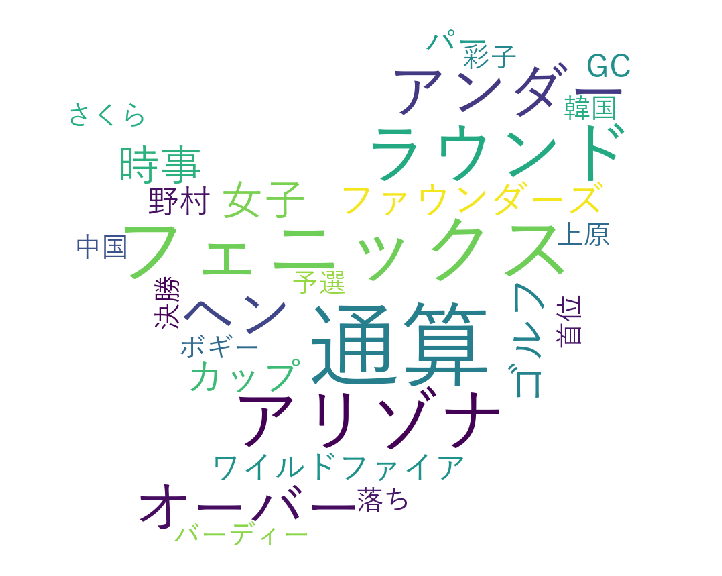

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import requests

import xlrd
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import os

import sys
import MeCab
from MeCab import Tagger

from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from scipy.misc import imread
import imageio


browser = webdriver.Chrome("./chromedriver.exe")

tlist = []
for page in range(1, 10):
    url = "https://news.yahoo.co.jp/flash?p="+str(page)

    browser.get(url)
    browser.implicitly_wait(10)

    try:
        for num in range(1, 5):
            search = "#main > div.epCategory > div > ul > li:nth-child("+str(num)+") > a > div"
            browser.find_element_by_css_selector(search).click()
            time.sleep(4)
            html = browser.page_source
            soup = BeautifulSoup(html, "html.parser")
            p = soup.select('p.ynDetailText.yjDirectSLinkTarget')
            for t in p:
                text = t.text
                tlist.append(text)
            browser.back()
            
    except (NoSuchElementException ,NameError):
        for num in range(7, 10):
            search = "#main > div.epCategory > div > ul > li:nth-child("+str(num)+") > a > div"
            browser.find_element_by_css_selector(search).click()
            time.sleep(4)
            html = browser.page_source
            soup = BeautifulSoup(html, "html.parser")
            p = soup.select('p.ynDetailText.yjDirectSLinkTarget')
            for t in p:
                text = t.text
                tlist.append(text)
            browser.back()
            
    

time.sleep(4)
browser.quit()

t = Tagger()

#리스트의 내용을 텍스트로 만듦
text= ''
for news in tlist:
    text += news

splitted = " ".join([x.split("\t")[0] for x in t.parse(text).splitlines()[:-1]])


splitted = " ".join([x.split("\t")[0] for x in t.parse(text).splitlines()[:-1] if x.split("\t")[1].split(",")[0] not in ["動詞","助詞", "助動詞"]])
splitted = splitted.replace("こと", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("ため", "")
splitted = splitted.replace("さん", "")
splitted = splitted.replace("よう", "")
splitted = splitted.replace("その", "")
splitted = splitted.replace("方々", "")
splitted = splitted.replace("たち", "")
splitted = splitted.replace("ぶり", "")
splitted = splitted.replace("度目", "")
splitted = splitted.replace("ともに", "")
splitted = splitted.replace("こと", "")
splitted = splitted.replace("こと", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("ごと", "")
splitted = splitted.replace("この", "")
splitted = splitted.replace("ため", "")
splitted = splitted.replace("さん", "")
splitted = splitted.replace("よう", "")
splitted = splitted.replace("そう", "")
splitted = splitted.replace("また", "")
splitted = splitted.replace("たち", "")
splitted = splitted.replace("ところ", "")    
splitted = splitted.replace("さらに", "")   
splitted = splitted.replace("試合", "")   
splitted = splitted.replace("社長", "")   
splitted = splitted.replace("選手", "")

    
twitter_mask = np.array(Image.open('3.png'))
fpath = "YuGothM.ttc" 

wordcloud = WordCloud(
                      font_path=fpath
                      ,background_color='white'
                      ,width=1200
                      ,height=1200
                      ,mask=twitter_mask
).generate(splitted)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Figure size 1200x1200 with 1 Axes>

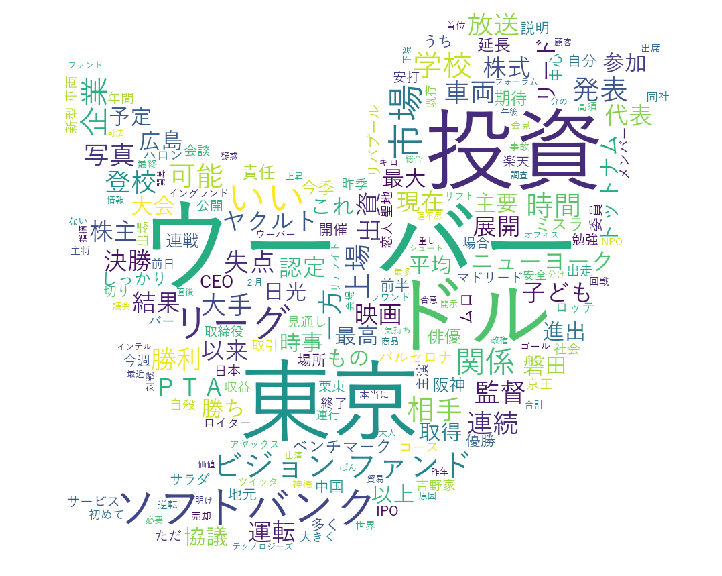

In [2]:
twitter_mask = np.array(Image.open('3.png'))
fpath = "YuGothM.ttc" 

wordcloud = WordCloud(
                      font_path=fpath
                      ,background_color='white'
                      ,width=1200
                      ,height=1200
                      ,mask=twitter_mask
).generate(splitted)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()